In [49]:
import time
import numpy as np
import numpy.random as rd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
N = 1024

In [3]:
idxs = np.linspace(0,N**3,num=N**3,endpoint=False,dtype=int)

In [4]:
rdm = np.random.rand(N**3)

In [5]:
nrch = np.random.choice(idxs,N**2,replace=False)

In [6]:
mrch = np.random.choice(idxs,N**2,replace=False)

In [7]:
index = idxs[nrch]
jndex = idxs[mrch]

In [8]:
print(np.float(np.min(index))/(N**3),np.float(np.max(index))/(N**3))

(4.568137228488922e-06, 0.9999993173405528)


In [9]:
X = np.zeros((N,N,N))
Y = np.zeros((N,N,N))
Z = np.zeros((N,N,N))

In [14]:
Delta = (2*np.pi)/N

In [15]:
start = time.time()

for i in range(N):
    X[i,:,:] = i*Delta
    
for j in range(N):
    Y[:,j,:] = j*Delta
    
for k in range(N):
    Z[:,:,k] = k*Delta

end = time.time()
print(end-start)

156.079788923


In [16]:
x = X.flatten()
y = Y.flatten()
z = Z.flatten()

In [ ]:
r2 = np.zeros((x.shape[0],8))

In [17]:
dx = x[index]-x[jndex]
dy = y[index]-y[jndex]
dz = z[index]-z[jndex]

In [23]:
dx[dx<0.] = - dx[dx<0.]
dy[dy<0.] = - dy[dy<0.]
dz[dz<0.] = - dz[dz<0.]

In [25]:
dx[dx > np.pi] = 2*np.pi - dx[dx > np.pi]
dy[dy > np.pi] = 2*np.pi - dy[dy > np.pi]
dz[dz > np.pi] = 2*np.pi - dz[dz > np.pi]

In [34]:
r2 = dx**2 + dy**2 + dz**2 
r2rt = np.sqrt(r2)

In [43]:
nbins = 100
minrt = 0. #np.min(r2rt)
maxrt = np.pi*np.sqrt(3) #np.max(r2rt)
bins = np.linspace(minrt,maxrt,num=nbins,endpoint=True)

In [44]:
print(minrt,maxrt,nbins)
print(bins)

(0.0, 5.4413980927026531, 100)
[ 0.          0.05496362  0.10992723  0.16489085  0.21985447  0.27481809
  0.3297817   0.38474532  0.43970894  0.49467255  0.54963617  0.60459979
  0.65956341  0.71452702  0.76949064  0.82445426  0.87941787  0.93438149
  0.98934511  1.04430872  1.09927234  1.15423596  1.20919958  1.26416319
  1.31912681  1.37409043  1.42905404  1.48401766  1.53898128  1.5939449
  1.64890851  1.70387213  1.75883575  1.81379936  1.86876298  1.9237266
  1.97869022  2.03365383  2.08861745  2.14358107  2.19854468  2.2535083
  2.30847192  2.36343554  2.41839915  2.47336277  2.52832639  2.58329
  2.63825362  2.69321724  2.74818085  2.80314447  2.85810809  2.91307171
  2.96803532  3.02299894  3.07796256  3.13292617  3.18788979  3.24285341
  3.29781703  3.35278064  3.40774426  3.46270788  3.51767149  3.57263511
  3.62759873  3.68256235  3.73752596  3.79248958  3.8474532   3.90241681
  3.95738043  4.01234405  4.06730767  4.12227128  4.1772349   4.23219852
  4.28716213  4.34212575  

In [45]:
hist,edges = np.histogram(r2rt,bins=bins)

In [47]:
pbins = (edges[0:nbins-1]+edges[1:nbins])/2

In [ ]:
print(edge)

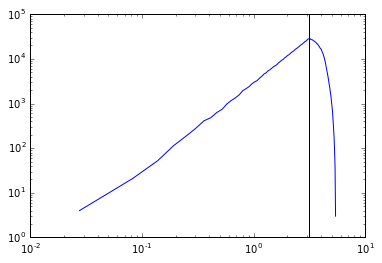

In [61]:
plt.loglog(pbins,hist)
plt.axvline(x=np.pi,color='k')

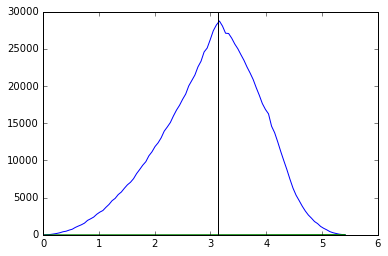

In [65]:
plt.plot(pbins,hist)
plt.plot(pbins,pbins**2,'g')
plt.axvline(x=np.pi,color='k')

In [62]:
iu = rdm[index]
ju = rdm[jndex]

In [66]:
du = iu-ju

In [68]:
print(du[du>0],du[du<=0])

(array([ 0.50756514,  0.04812345,  0.05929427, ...,  0.23857174,
        0.01983845,  0.14068513]), array([-0.1997023 , -0.21304893, -0.14105779, ..., -0.16597761,
       -0.41501656, -0.51734372]))


In [69]:
du2 = du**2

In [72]:
histr,edges = np.histogram(r2rt,bins=bins)
histu2,u2edges = np.histogram(r2rt,bins=bins,weights=du2)

In [73]:
print(histu2)

[  2.99447927e-01   3.45302120e+00   1.14620976e+01   1.78350787e+01
   3.30249660e+01   4.45730938e+01   7.09000159e+01   7.54056816e+01
   1.04356864e+02   1.25902161e+02   1.60994472e+02   2.03702047e+02
   2.20621166e+02   2.55972786e+02   3.33342912e+02   3.59577015e+02
   4.01821770e+02   4.76188854e+02   5.08631027e+02   5.60052805e+02
   6.14453832e+02   6.79918186e+02   7.62059564e+02   8.26351857e+02
   9.06044784e+02   9.39276172e+02   1.02699814e+03   1.14375853e+03
   1.17876962e+03   1.29308312e+03   1.38423739e+03   1.49716484e+03
   1.58446932e+03   1.60057283e+03   1.77684309e+03   1.86385238e+03
   1.93207561e+03   2.08592543e+03   2.16252426e+03   2.32058874e+03
   2.44852696e+03   2.53806217e+03   2.65604921e+03   2.79629637e+03
   2.93565075e+03   3.03717044e+03   3.18939631e+03   3.33475534e+03
   3.44418447e+03   3.54722170e+03   3.70486965e+03   3.83306687e+03
   4.11033400e+03   4.17333273e+03   4.37677372e+03   4.55903144e+03
   4.66800889e+03   4.75858647e+03

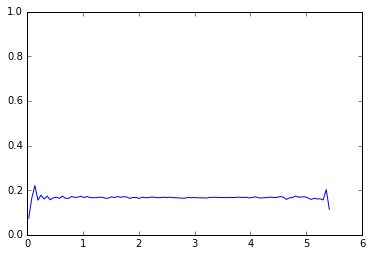

In [78]:
plt.ylim((0,1))
plt.plot(pbins,histu2/histr)